# Walmart Sales Forecasting

Description:
- Dataset (Recommended): Walmart Sales Forecast (Kaggle
- Predict future sales based on historical sales data
- Create time-based features (day, month, lag values)
- Apply regression models to forecast next period's sales©
- Plot actual vs. predicted values over time

## Table of contents
1. Importing libraries and data
2. Data preparation
3. Training model & Evaluation
4. Bonus Work: Comparing different Models
5. Submission

---

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'xgboost'

In [2]:
pa = '/kaggle/input/walmart-recruiting-store-sales-forecasting/'
# Load the datasets
train_df = pd.read_csv(pa +'train.csv.zip')
test_df = pd.read_csv(pa + 'test.csv.zip')
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# 2. Data preparatoin.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
# Convert Date column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Sort training data by date
train_df = train_df.sort_values('Date')

In [5]:
# Create lag features (last 4 weeks)
for i in range(1, 5):
    train_df[f'Lag_{i}'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(i)

# Create rolling average (4-week rolling mean)
train_df['Rolling_Avg_4'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

In [6]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['Week'] = train_df['Date'].dt.isocalendar().week

test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['Week'] = test_df['Date'].dt.isocalendar().week

In [7]:
train_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Lag_1             3331
Lag_2             6625
Lag_3             9889
Lag_4            13134
Rolling_Avg_4        0
Year                 0
Month                0
Day                  0
Week                 0
dtype: int64

In [8]:
train_df = train_df.fillna(0)

In [9]:
split_index = int(len(train_df) * 0.8)
train_data = train_df.iloc[:split_index]
val_data = train_df.iloc[split_index:]

features = ['Store', 'Dept', 'Year', 'Month', 'Week', 'Day', 'IsHoliday', 
            'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Rolling_Avg_4']
target = 'Weekly_Sales'

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# 3. Training model & Evaluation

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_val_lr = lr_model.predict(X_val)

mae_lr = mean_absolute_error(y_val, y_pred_val_lr)
f'Linear Regression Mean Absolute Error on validation set: {mae_lr}'

'Linear Regression Mean Absolute Error on validation set: 1146.655751727165'

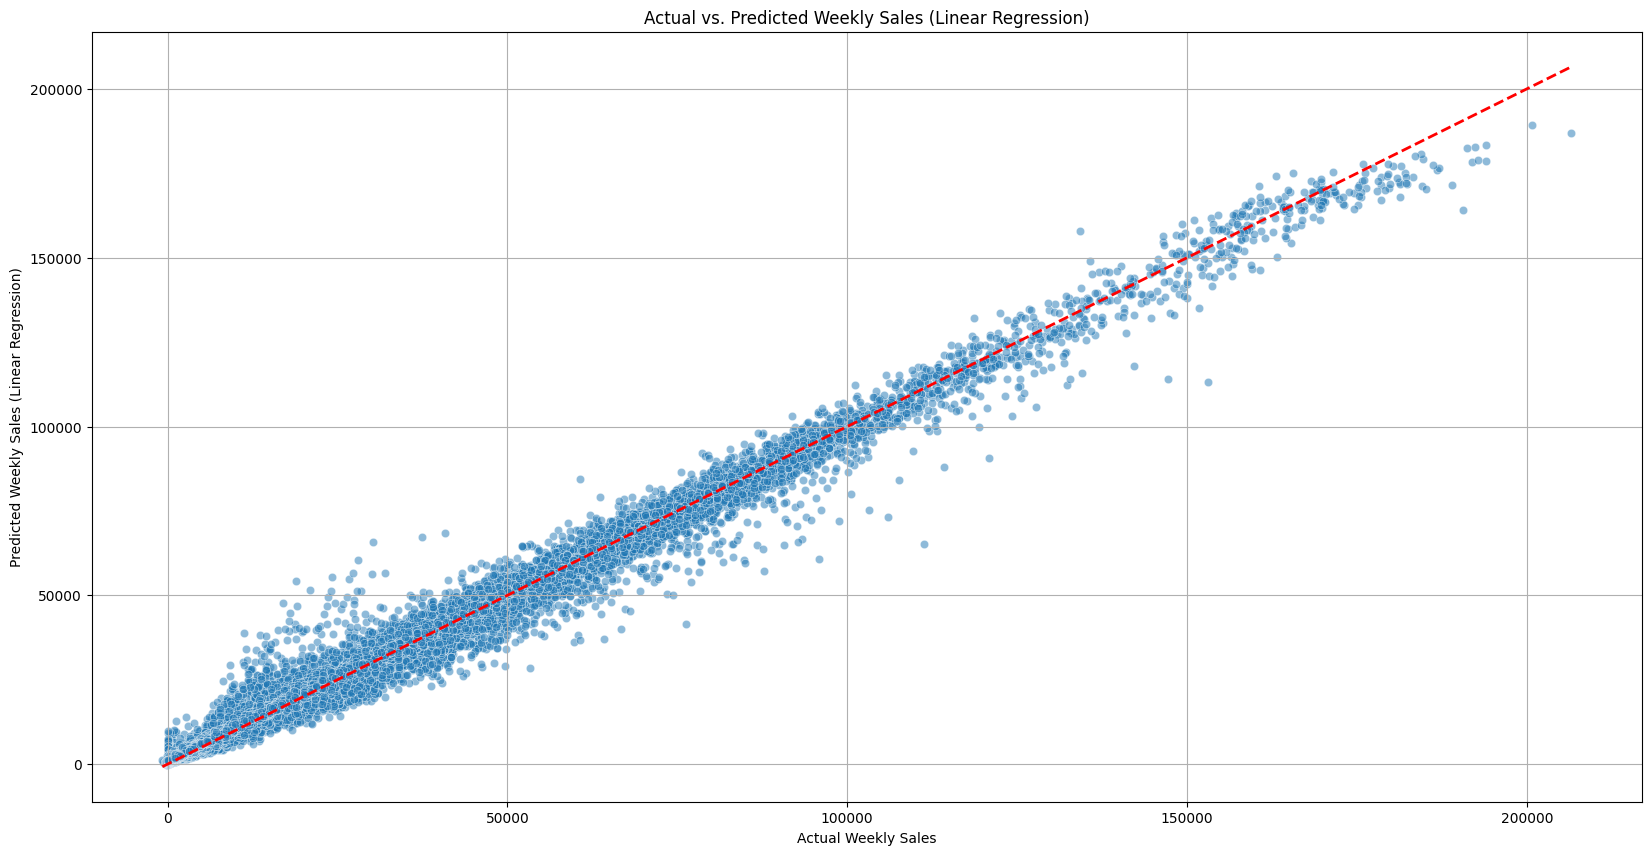

In [12]:
# 1. Actual vs. Predicted Sales Plot for Linear Regression
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_val, y=y_pred_val_lr, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales (Linear Regression)')
plt.title('Actual vs. Predicted Weekly Sales (Linear Regression)')
plt.grid(True)
plt.show()

# Bonus: Train XGBoost Model

In [13]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_val, y_pred_val_xgb)
print(f'XGBoost Mean Absolute Error on validation set: {mae_xgb}')

XGBoost Mean Absolute Error on validation set: 1002.9297832718994


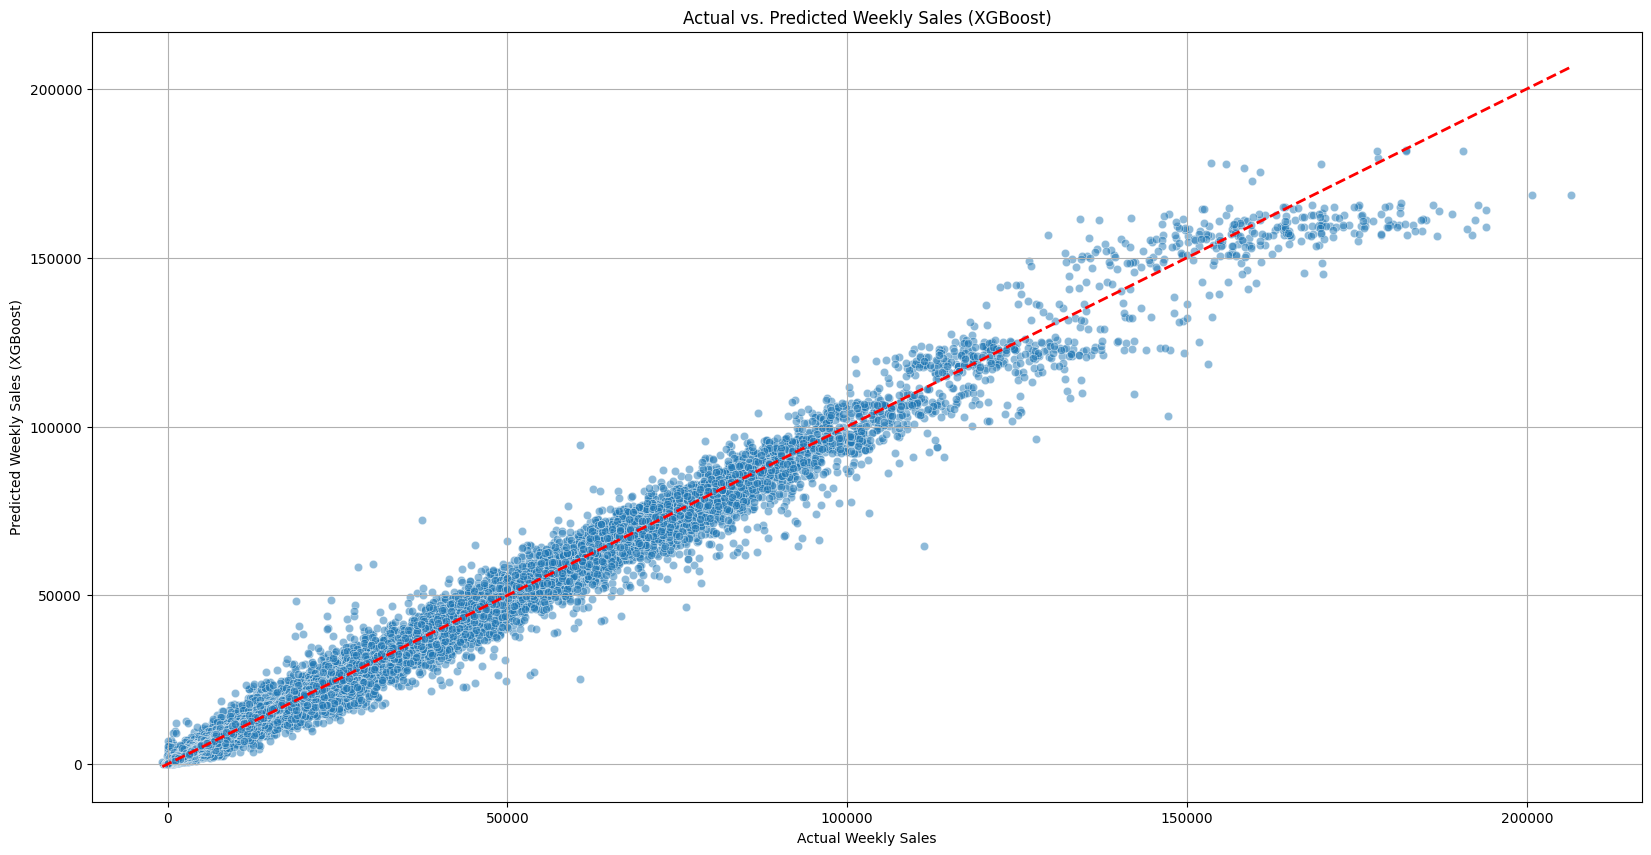

In [14]:
# 2. Actual vs. Predicted Sales Plot for XGBoost
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_val, y=y_pred_val_xgb, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales (XGBoost)')
plt.title('Actual vs. Predicted Weekly Sales (XGBoost)')
plt.grid(True)
plt.show()

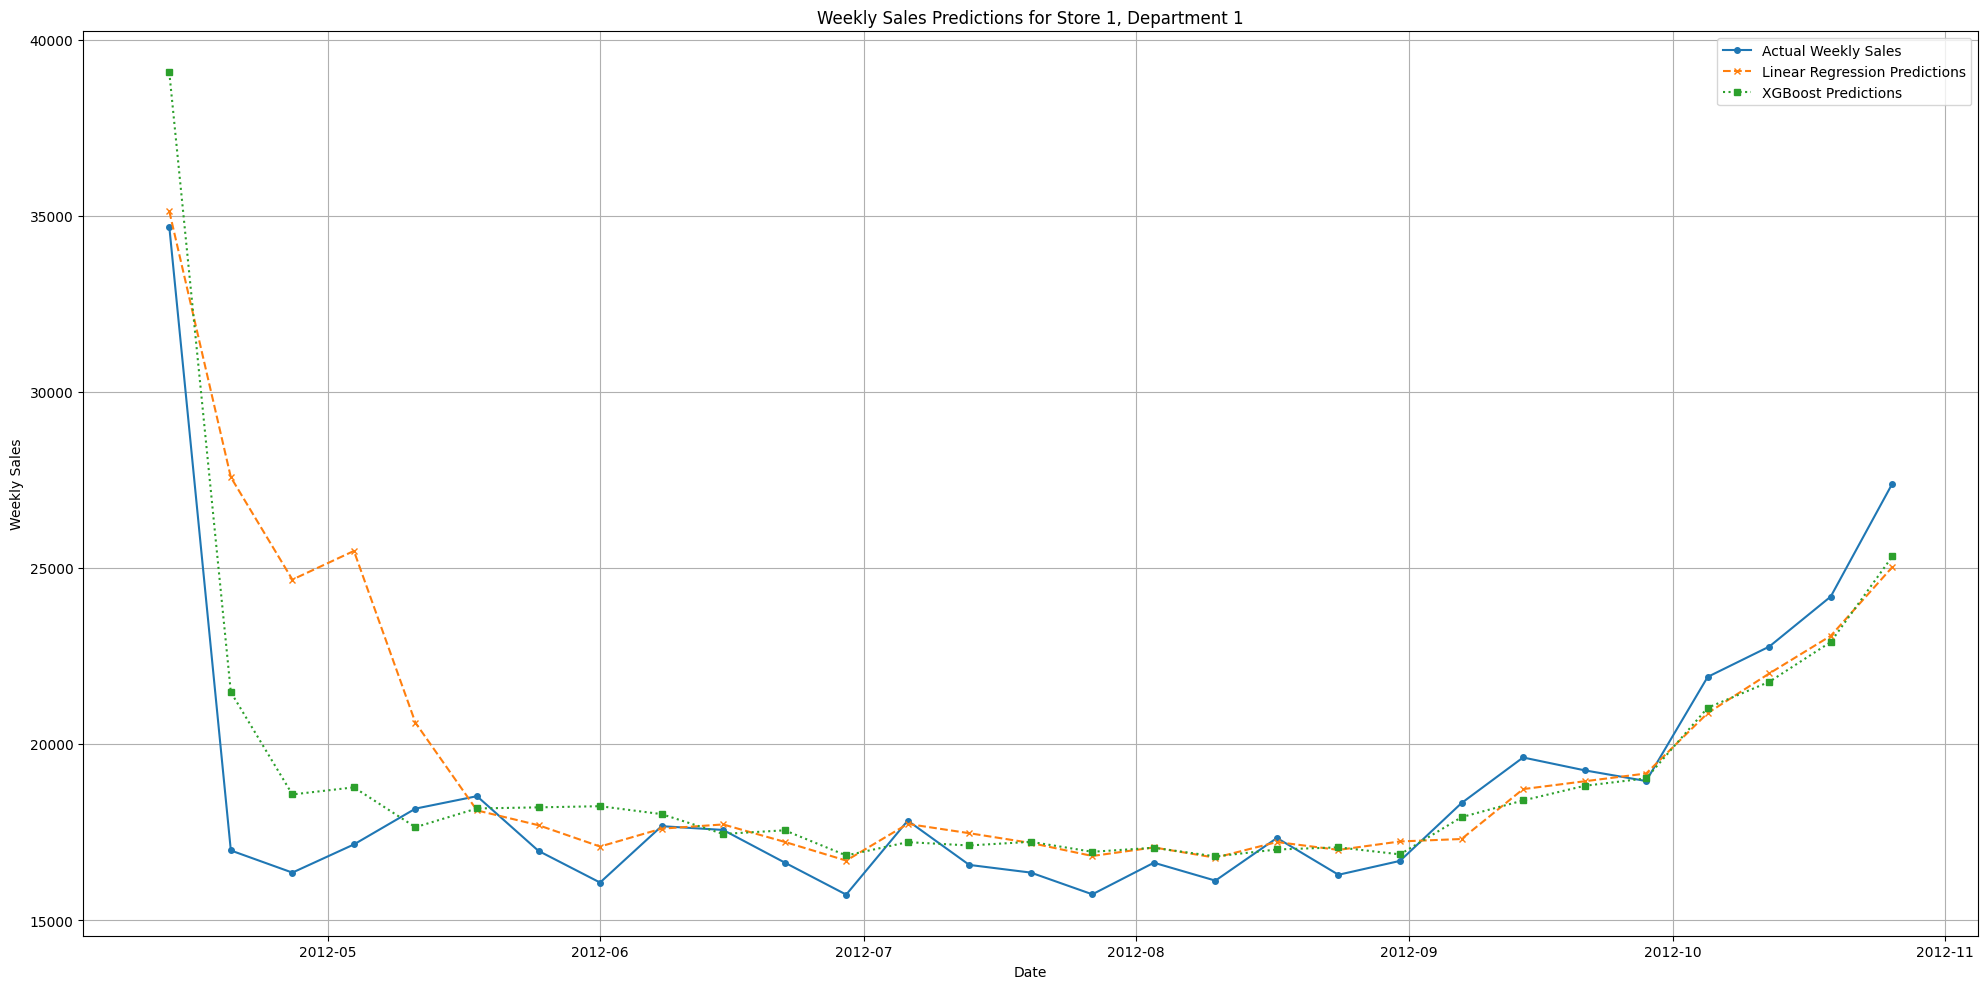

In [15]:
sample_store = 1
sample_dept = 1

val_data_sample = val_data[(val_data['Store'] == sample_store) & (val_data['Dept'] == sample_dept)].copy()
val_data_sample['Linear_Regression_Pred'] = y_pred_val_lr[
    (val_data['Store'] == sample_store) & (val_data['Dept'] == sample_dept)
]
val_data_sample['XGBoost_Pred'] = y_pred_val_xgb[
    (val_data['Store'] == sample_store) & (val_data['Dept'] == sample_dept)
]

plt.figure(figsize=(20, 10))
plt.plot(val_data_sample['Date'], val_data_sample['Weekly_Sales'], label='Actual Weekly Sales', marker='o', markersize=4)
plt.plot(val_data_sample['Date'], val_data_sample['Linear_Regression_Pred'], label='Linear Regression Predictions', linestyle='--', marker='x', markersize=4)
plt.plot(val_data_sample['Date'], val_data_sample['XGBoost_Pred'], label='XGBoost Predictions', linestyle=':', marker='s', markersize=4)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Weekly Sales Predictions for Store {sample_store}, Department {sample_dept}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---
# Submission 

In [16]:
last_train_data = train_df.groupby(['Store', 'Dept']).tail(1)[
    ['Store', 'Dept', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Rolling_Avg_4']
]
test_df = test_df.merge(last_train_data, on=['Store', 'Dept'], how='left')
test_df = test_df.fillna(0)

In [17]:
X_test = test_df[features]
y_pred_test_lr = lr_model.predict(X_test)
y_pred_test_xgb = xgb_model.predict(X_test)

# Save Linear Regression predictions
# submission_lr = test_df[['Store', 'Dept', 'Date']].copy()
# submission_lr['Weekly_Sales'] = y_pred_test_lr
# submission_lr['Id'] = (submission_lr['Store'].astype(str) + '_' + 
#                       submission_lr['Dept'].astype(str) + '_' + 
#                       submission_lr['Date'].dt.strftime('%Y-%m-%d'))
# submission_lr = submission_lr[['Id', 'Weekly_Sales']]
# submission_lr.to_csv('submission_lr.csv', index=False)
# print("Linear Regression predictions saved to 'submission_lr.csv'")

# Save XGBoost predictions
submission_xgb = test_df[['Store', 'Dept', 'Date']].copy()
submission_xgb['Weekly_Sales'] = y_pred_test_xgb
submission_xgb['Id'] = (submission_xgb['Store'].astype(str) + '_' + 
                        submission_xgb['Dept'].astype(str) + '_' + 
                        submission_xgb['Date'].dt.strftime('%Y-%m-%d'))
submission_xgb = submission_xgb[['Id', 'Weekly_Sales']]
submission_xgb.to_csv('submission_xgb.csv', index=False)
print("XGBoost predictions saved to 'submission_xgb.csv'")

XGBoost predictions saved to 'submission_xgb.csv'


# Thanks